
IMPORT LIBRARY

In [1]:
#Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
import seaborn as sns
from collections import Counter
warnings.filterwarnings("ignore")
%matplotlib inline

LOAD DATA SET

In [2]:
#load dataset
data = pd.read_csv('Data_test.csv')
data.tail()

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu
615,5.0,Ada,Rendah sekali,25.3,977.0,19,Hidupkan Lampu


MENGGANTI LABEL BERSPASI

In [3]:
data = data.rename(columns={'PH':'pH', 'intensitas air':'intensitas_air', 'tinggi air':'tinggi_air'})
data

,pH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pH              600 non-null    float64
 1   cahaya          590 non-null    object 
 2   intensitas_air  616 non-null    object 
 3   suhu            589 non-null    float64
 4   PPM             611 non-null    float64
 5   tinggi_air      616 non-null    int64  
 6   aksi            616 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 33.8+ KB


In [5]:
data['aksi'].value_counts()

Tidak melakukan apa-apa                 473
Hidupkan Lampu                           92
Hidupkan Lampu dan Pompa nutrisi TDS     39
Hidupkan Pompa nutrisi TDS               12
Name: aksi, dtype: int64

In [6]:
data['cahaya'].value_counts()

Ada          302
Tidak ada    288
Name: cahaya, dtype: int64

In [7]:
data['intensitas_air'].value_counts()

Rendah sekali    154
Tinggi           154
Rendah           154
Cukup            154
Name: intensitas_air, dtype: int64

In [8]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/616)*100})
missing_data

,total_missing,perc_missing
pH,16,2.597403
cahaya,26,4.220779
intensitas_air,0,0.000000
suhu,27,4.383117
PPM,5,0.811688
tinggi_air,0,0.000000
aksi,0,0.000000


In [9]:
data.describe()

,pH,suhu,PPM,tinggi_air
count,600.000000,589.000000,611.000000,616.000000
mean,6.655167,29.364007,1032.836334,288.173701
std,3.043234,14.937524,632.614766,622.457710
min,0.000000,-300.000000,1.000000,0.000000
25%,5.500000,27.100000,487.500000,50.000000
50%,6.500000,29.900000,991.000000,230.000000
75%,7.700000,33.000000,1603.500000,429.500000
max,14.000000,40.600000,2149.000000,12000.000000


In [10]:
del data["tinggi_air"]
data.head()

,pH,cahaya,intensitas_air,suhu,PPM,aksi
0,6.5,Ada,Tinggi,27.0,188.0,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,Tidak melakukan apa-apa


In [11]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/616)*100})
missing_data

,total_missing,perc_missing
pH,16,2.597403
cahaya,26,4.220779
intensitas_air,0,0.000000
suhu,27,4.383117
PPM,5,0.811688
aksi,0,0.000000


In [12]:
def getNumber(str):
    if str=="Ada":
        return 1
    elif str=="Tidak ada":
        return 0
    else:
        return str

data["cahaya"] = data["cahaya"].apply(getNumber)

data.head()

,pH,cahaya,intensitas_air,suhu,PPM,aksi
0,6.5,1.0,Tinggi,27.0,188.0,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,1.0,Tinggi,26.9,79.0,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,1.0,Tinggi,27.0,11.0,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,1.0,Tinggi,27.1,345.0,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,Tidak melakukan apa-apa


In [13]:
def getNumber(str):
    if str=="Tidak melakukan apa-apa":
        return 3
    elif str=="Hidupkan Lampu":
        return 2
    elif str=="Hidupkan Lampu dan Pompa nutrisi TDS":
        return 1
    elif str=="Hidupkan Pompa nutrisi TDS":
        return 0
    else:
        return str

data["aksi"] = data["aksi"].apply(getNumber)

data.head()

,pH,cahaya,intensitas_air,suhu,PPM,aksi
0,6.5,1.0,Tinggi,27.0,188.0,1
1,5.7,1.0,Tinggi,26.9,79.0,1
2,6.0,1.0,Tinggi,27.0,11.0,1
3,6.5,1.0,Tinggi,27.1,345.0,3
4,6.2,NaN,Tinggi,27.1,602.0,3


In [14]:
def getNumber(str):
    if str=="Rendah":
        return 3
    elif str=="Cukup":
        return 2
    elif str=="Tinggi":
        return 1
    elif str=="Rendah sekali":
        return 0
    else:
        return str

data["intensitas_air"] = data["intensitas_air"].apply(getNumber)

data.head()

,pH,cahaya,intensitas_air,suhu,PPM,aksi
0,6.5,1.0,1,27.0,188.0,1
1,5.7,1.0,1,26.9,79.0,1
2,6.0,1.0,1,27.0,11.0,1
3,6.5,1.0,1,27.1,345.0,3
4,6.2,NaN,1,27.1,602.0,3


In [15]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/616)*100})
missing_data

,total_missing,perc_missing
pH,16,2.597403
cahaya,26,4.220779
intensitas_air,0,0.000000
suhu,27,4.383117
PPM,5,0.811688
aksi,0,0.000000


In [16]:
#Mengelompokkan missing value
column_missing = ['pH', 'cahaya', 'suhu', 'PPM']
column_missing

['pH', 'cahaya', 'suhu', 'PPM']

In [17]:
#Solve Missing value
for col in column_missing:
  data[col].replace(np.nan, data[col].mean(), inplace=True)

data.isnull().sum()

pH                0
cahaya            0
intensitas_air    0
suhu              0
PPM               0
aksi              0
dtype: int64

In [18]:
data.columns

Index(['pH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'aksi'], dtype='object')

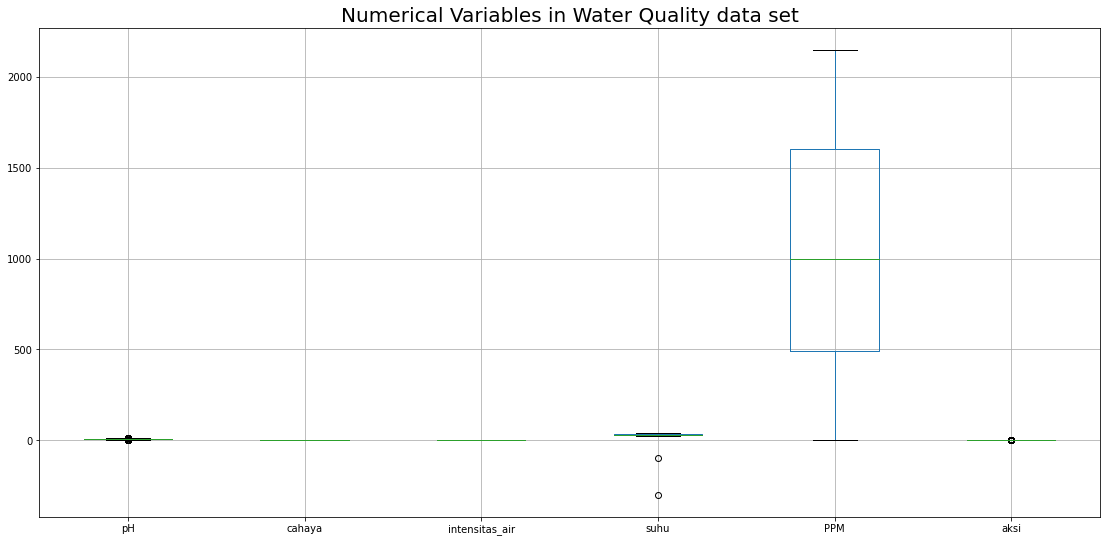

In [20]:
num_col = ['pH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'aksi']
plt.figure(figsize=(19,9))
data[num_col].boxplot()
plt.title("Numerical Variables in Water Quality data set", fontsize=20)
plt.show()

MEMISAHKAN FEATURE DAN LABEL

In [22]:
#definisi x
X = data.iloc[:,:5].values
X

array([[6.500e+00, 1.000e+00, 1.000e+00, 2.700e+01, 1.880e+02],
       [5.700e+00, 1.000e+00, 1.000e+00, 2.690e+01, 7.900e+01],
       [6.000e+00, 1.000e+00, 1.000e+00, 2.700e+01, 1.100e+01],
       ...,
       [3.200e+00, 1.000e+00, 0.000e+00, 2.530e+01, 7.930e+02],
       [1.400e+00, 1.000e+00, 0.000e+00, 2.540e+01, 1.052e+03],
       [5.000e+00, 1.000e+00, 0.000e+00, 2.530e+01, 9.770e+02]])

In [23]:
#definisi y
Y = data.iloc[:, 5].values 
Y

array([1, 1, 1, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 1, 3, 1, 1, 1,

In [24]:
counter = Counter(Y) #Check Balance data
print(counter)

Counter({3: 473, 2: 92, 1: 39, 0: 12})


In [25]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
X_smote, Y_smote = oversample.fit_resample(X, Y)

In [26]:
counter = Counter(Y_smote)
print(counter)

Counter({1: 473, 3: 473, 2: 473, 0: 473})


MELAKUKAN NORMALISASI DATA DENGAN MIN MAX SCALER

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()
# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.46428571 1.         0.33333333 0.96007046 0.08705773]
 [0.40714286 1.         0.33333333 0.95977686 0.03631285]
 [0.42857143 1.         0.33333333 0.96007046 0.00465549]
 ...
 [0.22857143 1.         0.         0.95507927 0.36871508]
 [0.1        1.         0.         0.95537287 0.48929236]
 [0.35714286 1.         0.         0.95507927 0.45437616]]


In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)

KNN METHOD

In [30]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
from sklearn import metrics

y_predict = knn.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_predict))

Test set Accuracy:  0.8225806451612904


In [32]:
Ks = 10
mean_acc = np.zeros((Ks))


for n in range(1,Ks+1):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    y_predict=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, y_predict)

mean_acc

array([0.84677419, 0.80645161, 0.7983871 , 0.78225806, 0.82258065,
       0.7983871 , 0.82258065, 0.79032258, 0.83064516, 0.82258065])

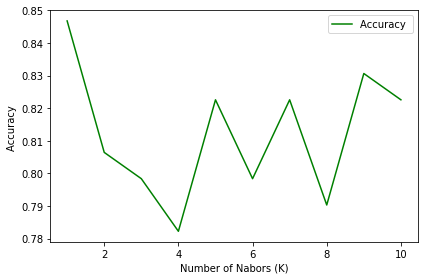

In [33]:
plt.plot(range(1,Ks+1),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [34]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8467741935483871 with k= 1
